2022 FIFA's Soccer World Cup

Dataset: https://www.kaggle.com/datasets/shilongzhuang/soccer-world-cup-challenge

In [1]:
# Libraries
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Connection to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the Datasets

In [3]:
# Load all datasets from folder

# Using glob to get all the csv files in the folder
path = "/content/drive/MyDrive/ML Projects/2022 World Cup/dataset"
csv_files = glob.glob(os.path.join(path, "*.csv")) 

# Dictionary with original datasets
d = {}

# Loop over the list of csv files
for file in csv_files:

    filename = (file.split("/")[-1]).split(".")[0]

    #Read the csv file
    d[filename] = pd.read_csv(file)

    #Print the file name and content
    print(filename)
    display(d[filename].tail())
    print()

world_cup_matches


,ID,Year,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Host Team
895,896,2018,2018/7/7,Quarter-finals,Russia,2,2,Croatia,NaN,NaN,Croatia win on penalties (3 - 4),True
896,897,2018,2018/7/10,Semi-finals,France,1,0,Belgium,France,Belgium,NaN,False
897,898,2018,2018/7/11,Semi-finals,Croatia,2,1,England,Croatia,England,Extra time,False
898,899,2018,2018/7/14,Third place,Belgium,2,0,England,Belgium,England,NaN,False
899,900,2018,2018/7/15,Final,France,4,2,Croatia,France,Croatia,NaN,False



2022_world_cup_matches


,ID,Year,Date,Stage,Home Team,Away Team,Host Team
59,60,2022,2022/12/10,Quarter-finals,W55,W56,NaN
60,61,2022,2022/12/13,Semi-finals,W57,W58,NaN
61,62,2022,2022/12/14,Semi-finals,W59,W60,NaN
62,63,2022,2022/12/17,Third place,L61,L62,NaN
63,64,2022,2022/12/18,Final,W61,W62,NaN



world_cups


,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played
17,2006,Germany,Italy,France,Germany,Portugal,147.0,32,64
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145.0,32,64
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171.0,32,64
20,2018,Russia,France,Croatia,Belgium,England,169.0,32,64
21,2022,Qatar,NaN,NaN,NaN,NaN,NaN,32,64



international_matches


,ID,Tournament,Date,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Home Stadium
17764,17765,Friendly,2022/9/27,Qatar,2,2,Chile,NaN,NaN,NaN,False
17765,17766,Friendly,2022/9/27,Saudi Arabia,0,0,United States,NaN,NaN,NaN,False
17766,17767,UEFA Nations League,2022/9/27,Portugal,0,1,Spain,Spain,Portugal,NaN,True
17767,17768,UEFA Nations League,2022/9/27,Switzerland,2,1,Czech Republic,Switzerland,Czech Republic,NaN,True
17768,17769,UEFA Nations League,2022/9/27,Norway,0,2,Serbia,Serbia,Norway,NaN,True



2022_world_cup_groups


,Group,Team,FIFA Ranking
27,G,Cameroon,43
28,H,Portugal,9
29,H,Ghana,61
30,H,Uruguay,14
31,H,South Korea,28



data_dictionary


,Table,Field,Description
33,international_matches,Home Goals,Goals scored by the home team
34,international_matches,Away Goals,Goals scored by the away team
35,international_matches,Away Team,Country playing as the away team
36,international_matches,Win Conditions,Was the match decided by penalties?
37,international_matches,Home Stadium,TRUE whenever the game took place in the home ...


# Data Exploration

## Analysis on **world_cups** Dataset

In [4]:
df_world_cups = d['world_cups'].copy()
df_world_cups.tail()

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played
17,2006,Germany,Italy,France,Germany,Portugal,147.0,32,64
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145.0,32,64
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171.0,32,64
20,2018,Russia,France,Croatia,Belgium,England,169.0,32,64
21,2022,Qatar,NaN,NaN,NaN,NaN,NaN,32,64


In [5]:
# Handling null values
df_world_cups.dropna(subset=['Winner'], inplace = True)
df_world_cups

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13,18
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70.0,16,17
2,1938,France,Italy,Hungary,Brazil,Sweden,84.0,15,18
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88.0,13,22
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140.0,16,26
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126.0,16,35
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89.0,16,32
7,1966,England,England,Germany FR,Portugal,Soviet Union,89.0,16,32
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95.0,16,32
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97.0,16,38


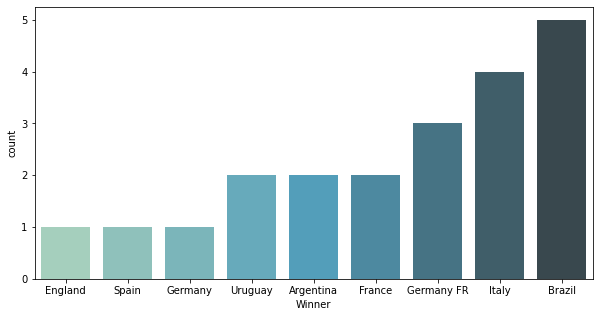

In [6]:
# Number of times each country won the cup

plt.figure(figsize=(10,5))
sns.countplot(
    data = df_world_cups,
    x = 'Winner',
    order = df_world_cups.Winner.value_counts(ascending=True).index,
    palette = "GnBu_d"
)
plt.show()

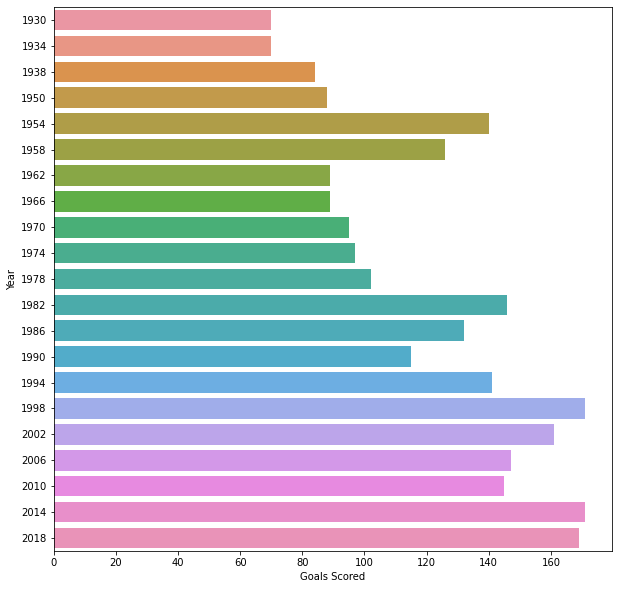

In [7]:
# Sum of goals scored per year

plt.figure(figsize=(10,10))
sns.barplot(
    data = df_world_cups,
    x = 'Goals Scored', 
    y = df_world_cups.Year.astype(str)
)
plt.show()


From the chat above, we can see a growth trend in goals scored per cup, and by using the gradient, I will group the years in periods of 7 cups to analyze outliers.

In [8]:
# Grouping up

df_world_cups2 = df_world_cups[['Year','Goals Scored']].copy()

df_world_cups2.insert(0,'Era','')
df_world_cups2['Era'] = np.where(
    df_world_cups2['Year'] <= 1962, 
    1, 
    np.where(
        (df_world_cups2['Year'] >= 1962) & (df_world_cups2['Year'] <= 1990), 
        2, 
        3
    )
)

df_world_cups2

,Era,Year,Goals Scored
0,1,1930,70.0
1,1,1934,70.0
2,1,1938,84.0
3,1,1950,88.0
4,1,1954,140.0
5,1,1958,126.0
6,1,1962,89.0
7,2,1966,89.0
8,2,1970,95.0
9,2,1974,97.0


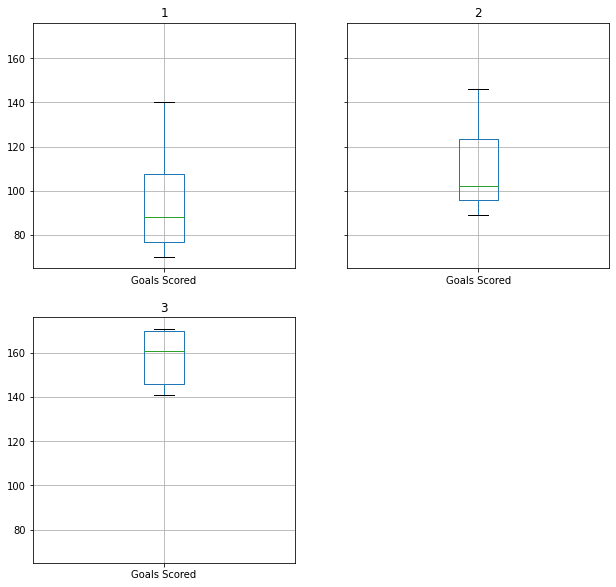

In [9]:
# Box-Plot analysis

df_world_cups2.groupby("Era").boxplot(column="Goals Scored", figsize=(10,10));

Surprisingly enough, the '54 and the '82 cups were **not** considered outliers inside their respective groups

In [10]:
# Influence of playing home

df_world_cups3 = df_world_cups[['Host Country','Winner','Runners-Up','Third']].copy()

# Renaming columns
df_world_cups3.rename(
    columns={
        'Host Country': 'Host', 
        'Winner': 'First', 
        'Runners-Up' : 'Second'
    }, 
    inplace=True
)

# Check if final placement equals host

for col in ['First','Second','Third']:
    df_world_cups3[col] = np.where(df_world_cups3['Host'] == df_world_cups3[col], 1, 0)

# New row summarizing columns
df_world_cups3.append(df_world_cups3.sum(numeric_only=True).rename('Total'))

,Host,First,Second,Third
0,Uruguay,1.0,0.0,0.0
1,Italy,1.0,0.0,0.0
2,France,0.0,0.0,0.0
3,Brazil,0.0,1.0,0.0
4,Switzerland,0.0,0.0,0.0
5,Sweden,0.0,1.0,0.0
6,Chile,0.0,0.0,1.0
7,England,1.0,0.0,0.0
8,Mexico,0.0,0.0,0.0
9,Germany,0.0,0.0,0.0


Throughout 20 cups, the hosting country:
- went 10 times to the podium (50%)
- won first place 5 times (25%)

## Analysis on **2022_world_cup_groups** Dataset

In [11]:
world_cup_groups = d['2022_world_cup_groups'].copy()
world_cup_groups.sort_values(by=['FIFA Ranking'], inplace = True)
world_cup_groups.tail()

,Group,Team,FIFA Ranking
27,G,Cameroon,43
1,A,Ecuador,44
0,A,Qatar,50
9,C,Saudi Arabia,51
29,H,Ghana,61


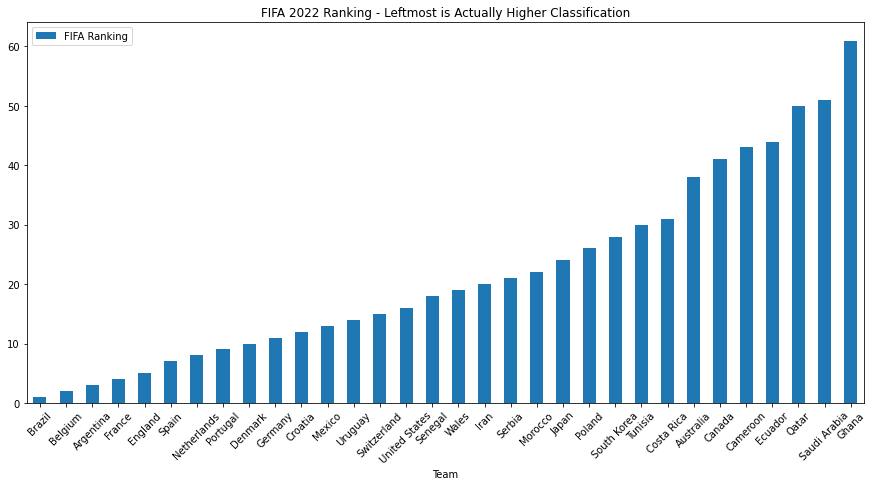

In [12]:
world_cup_groups.plot(
    kind = 'bar', 
    figsize=(15,7), 
    x='Team', 
    y='FIFA Ranking', 
    rot = 45,
    title = 'FIFA 2022 Ranking - Leftmost is Actually Higher Classification',
)

## Analysis on **world_cup_matches** Dataset

In [13]:
df_world_cup_matches = d['world_cup_matches'].copy()

df_world_cup_matches = df_world_cup_matches[
    ['Year','Date','Stage','Home Team','Home Goals','Away Goals','Away Team','Winning Team','Win Conditions']
]

df_world_cup_matches.tail(10)

,Year,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Win Conditions
890,2018,2018/7/3,Round of 16,Sweden,1,0,Switzerland,Sweden,NaN
891,2018,2018/7/3,Round of 16,Colombia,1,1,England,NaN,England win on penalties (3 - 4)
892,2018,2018/7/6,Quarter-finals,Uruguay,0,2,France,France,NaN
893,2018,2018/7/6,Quarter-finals,Brazil,1,2,Belgium,Belgium,NaN
894,2018,2018/7/7,Quarter-finals,Sweden,0,2,England,England,NaN
895,2018,2018/7/7,Quarter-finals,Russia,2,2,Croatia,NaN,Croatia win on penalties (3 - 4)
896,2018,2018/7/10,Semi-finals,France,1,0,Belgium,France,NaN
897,2018,2018/7/11,Semi-finals,Croatia,2,1,England,Croatia,Extra time
898,2018,2018/7/14,Third place,Belgium,2,0,England,Belgium,NaN
899,2018,2018/7/15,Final,France,4,2,Croatia,France,NaN


In [14]:
# Checking for missing values
pd.isnull(df_world_cup_matches).sum()

Year                0
Date                0
Stage               0
Home Team           0
Home Goals          0
Away Goals          0
Away Team           0
Winning Team      199
Win Conditions    838
dtype: int64

In [15]:
# Handling missing values on Winning Team

df_world_cup_matches['aux'] = df_world_cup_matches['Win Conditions'].str.split("win", expand=True)[0]
df_world_cup_matches['Winning Team'] = np.where(
    df_world_cup_matches['Winning Team'].isnull(),
    (np.where(df_world_cup_matches['aux'].isnull(), 'Draw',df_world_cup_matches['aux'])),
    df_world_cup_matches['Winning Team']
)

df_world_cup_matches.drop(columns=['Win Conditions','aux'], inplace=True)

display(pd.isnull(df_world_cup_matches).sum())

Year            0
Date            0
Stage           0
Home Team       0
Home Goals      0
Away Goals      0
Away Team       0
Winning Team    0
dtype: int64

In [16]:
# Converting 'Date' column to datetime

df_world_cup_matches['Date'] =  pd.to_datetime(df_world_cup_matches['Date'], format='%Y/%m/%d')
df_world_cup_matches

,Year,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team
0,1930,1930-07-13,Group stage,France,4,1,Mexico,France
1,1930,1930-07-13,Group stage,United States,3,0,Belgium,United States
2,1930,1930-07-14,Group stage,Yugoslavia,2,1,Brazil,Yugoslavia
3,1930,1930-07-14,Group stage,Romania,3,1,Peru,Romania
4,1930,1930-07-15,Group stage,Argentina,1,0,France,Argentina
...,...,...,...,...,...,...,...,...
895,2018,2018-07-07,Quarter-finals,Russia,2,2,Croatia,Croatia
896,2018,2018-07-10,Semi-finals,France,1,0,Belgium,France
897,2018,2018-07-11,Semi-finals,Croatia,2,1,England,Croatia
898,2018,2018-07-14,Third place,Belgium,2,0,England,Belgium


### Let's begin by appending Year, Stage, Home Team, Away e Goals in a way that there is only one summarized table


In [47]:
# Goals per Team

df_world_cup_matches_aux_1 = df_world_cup_matches[['Year','Stage','Home Team','Home Goals']].copy()
df_world_cup_matches_aux_1.rename(columns={'Home Team': 'Team', 'Home Goals': 'Goals'}, inplace=True)

df_world_cup_matches_aux_2 = df_world_cup_matches[['Year','Stage','Away Team','Away Goals']].copy()
df_world_cup_matches_aux_2.rename(columns={'Away Team': 'Team', 'Away Goals': 'Goals'}, inplace=True)

goals_per_team = df_world_cup_matches_aux_1.append(df_world_cup_matches_aux_2, ignore_index=True)
display(goals_per_team.tail())

#Clear memory
del df_world_cup_matches_aux_1
del df_world_cup_matches_aux_2

,Year,Stage,Team,Goals
1795,2018,Quarter-finals,Croatia,2
1796,2018,Semi-finals,Belgium,0
1797,2018,Semi-finals,England,1
1798,2018,Third place,England,0
1799,2018,Final,Croatia,2


In [48]:
# Summarize

#goals_per_team_sum = goals_per_team.groupby(['Year', 'Stage', 'Team']).agg(Goals=('Goals', 'sum')).reset_index() 
goals_per_team_sum = goals_per_team.groupby(['Stage', 'Team']).agg(Goals=('Goals', 'sum')).reset_index() 

goals_per_team_sum.tail(10)

,Stage,Team,Goals
279,Third place,Italy,3
280,Third place,Netherlands,4
281,Third place,Poland,4
282,Third place,Portugal,3
283,Third place,Russia,1
284,Third place,South Korea,2
285,Third place,Sweden,6
286,Third place,Turkey,3
287,Third place,Uruguay,3
288,Third place,Yugoslavia,0


### Now we are going to convert the stages into numbers, so we can plot a **scatterplot** with goals. This way we can understand the performance of each team throughout the Cup


In [49]:
goals_per_team_sum['Stage'].unique()

array(['Final', 'Final round', 'First group stage', 'First round',
       'Group stage', 'Quarter-finals', 'Round of 16',
       'Second group stage', 'Semi-finals', 'Third place'], dtype=object)

In [20]:
# Dictionary with the 'translation' of each stage

stages_dict = {
    'First group stage'     : 0, 
    'First round'           : 0,
    'Second group stage'    : 0, 
    'Final round'           : 0,
    'Group stage'           : 1, 
    'Round of 16'           : 2,
    'Quarter-finals'        : 3,    
    'Semi-finals'           : 4,   
    'Third place'           : 5,   
    'Final'                 : 6,
}

In [55]:
goals_per_team_sum.replace({"Stage": stages_dict}, inplace = True)

# The pre-world cup stages won't be used for this study
goals_per_team_sum = goals_per_team_sum[goals_per_team_sum.Stage > 0]

# Sort and print
#goals_per_team_sum = goals_per_team_sum.sort_values(by=['Year', 'Stage','Team'])
goals_per_team_sum = goals_per_team_sum.sort_values(by=['Stage','Team'])
goals_per_team_sum.head()

,Stage,Team,Goals
65,1,Algeria,7
66,1,Angola,1
67,1,Argentina,69
68,1,Australia,13
69,1,Austria,13


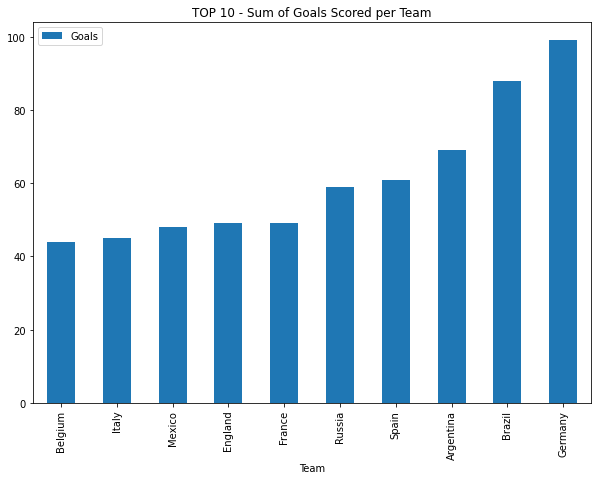

In [74]:
goals_per_team_sum.sort_values(by=['Goals']).tail(10).plot(
    kind = 'bar', 
    figsize=(10,7), 
    x='Team', 
    y='Goals', 
    rot = 90,
    title = 'TOP 10 - Sum of Goals Scored per Team',
)

Comparing this graph with the FIFA 2022 Ranking:

- **Brazil**, which occupies first place in Ranking, is second in the sum of goals;

- **Argentina** is in third place on both charts;

- **Germany**, the team that scored the most goals in history, occupies eleventh place in the Ranking;

- **Belgium**, second in the ranking, is tenth in goals scored.

In [22]:
#for year_ in goals_per_team_sum.Year.unique():
#
#    fig, ax = plt.subplots(figsize=(5, 4))
#    sns.scatterplot(
#        data = goals_per_team_sum[goals_per_team_sum.Year == year_], 
#        x='Stage', 
#        y='Goals', 
#        hue='Team',
#        ax=ax
#    )

#    ax.set(xlabel='Stage', ylabel='Goals')
#    ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)
#    fig.suptitle('%s - Teams Goals per Stage' % year_)
#    plt.show()

In [56]:
import altair as alt
data = goals_per_team_sum#[goals_per_team_sum.Year == 2018]

alt.Chart(data).mark_point().encode(
    x='Stage',
    y='Goals',
    #color='Team',
    tooltip=['Team', 'Goals']
).interactive()

alt.Chart(...)

## Data Modeling

### Deciding how to approach the problem:
- Regression
- Classification

Apart from some overlaps between the two types of machine learning algorithms, the most significant difference between the two is that while **regression helps predict a continuous quantity, classification predicts discrete class labels**. 

<br>
<div>
<img src="https://lh4.googleusercontent.com/K17BRCQTR5hHU-qOthrs9KIQa4DLAWJh5jeXkyn6NZRQfimHnCAadWbw3EaZPZl1bit2IBQPeBv1CZURiyFYkIDPH1Z3Pb0O_qkeS9av7vrEtQLpMLWdtDJ7YNlRki8CoAsY8bmn" width="500"/>
</div>
<br>

Applying the above idea to our project:

- **Regression:** How many goals will each team score?

> A regression algorithm in this case can be used in this to predict how many goals a team will score based on their performance on previous games/cups. We use regression in this case because goal is a continuous quantity. There is an infinite number of possible values for a team's score.

- **Classification:** What is the chance of each team to win?

> On the other hand, classification can be used to analyse whether team is likely to win the cup or not. The algorithm checks the performance of each team throught each stage of the previous cups to find out the probability of this team to win the next one. Similarly, while a regression model can be used to predict number of goals scored in the following cup, we can use a classification algorithm to determine whether it will be the winning team.